# PROYECTO NO. 1 Data Science

#### 1. Crear un entorno de anaconda con los paquetes que considere necesarios

In [1]:
#Inciaremos importando las librerías a usar en el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from prettytable import PrettyTable

In [2]:
	
9998796400000000000/10

9.9987964e+17

#### Usando slicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validación y pruebas(20 %).

In [3]:
#En base a las indicaciones se procede a leer el archivo necesario y hacer un slicing array con numpy 
dataset = np.load("proyecto_training_data.npy")
num_nans = np.count_nonzero(np.isnan(dataset))
print("Hay", num_nans, "valores NaN en la matriz.")
size_to_train = int(len(dataset) * 0.8)
data_train = dataset[:size_to_train]
data_test = dataset[size_to_train:]
total_data = dataset.shape
print("El tamaño del set de datos total es de: " + str(total_data))
size_of_train_data = data_train.shape
print("El tamaño del set de datos para el entrenamiento es de: " + str(size_of_train_data))
size_of_data_test= data_test.shape
print("El tamaño del set de datos para las pruebas es de: " + str(size_of_data_test))

Hay 259 valores NaN en la matriz.
El tamaño del set de datos total es de: (1460, 6)
El tamaño del set de datos para el entrenamiento es de: (1168, 6)
El tamaño del set de datos para las pruebas es de: (292, 6)


In [4]:
#Debido a que el proyecto solicita hacerlo con Numpy slicing, sin embargo yo recomendaría numpy split, dejo el código
data_train2, data_test2 = np.split(dataset, [size_to_train])

#### Análisis exploratorio de datos: Para cada variable en el dataset calcular:
 - media
 - valor máximo
 - valor míınimo
 - rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
 - desviacióon estándar.

In [5]:
#Se le agregan los nombres a cada una de las columnas
dataset_pandas = pd.DataFrame(dataset, columns = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
pd.options.display.float_format = "{:,.2f}".format
num = [ float('%.2f' % elem) for elem in list(np.arange(0, 1, 0.1)) ]
#Por facilidad el análisis se realizara mediante pandas con la función describe en donde se mostraran los percentiles con aumento de 0.1
un_stats = dataset_pandas.describe(percentiles=num)
print('\nInformación estadística:')
un_stats


Información estadística:


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,"1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,201.00"
mean,"180,921.20",6.10,"1,162.63",6.52,"1,971.27",70.05
std,"79,442.50",1.38,386.59,1.63,30.20,24.28
min,"34,900.00",1.00,334.00,2.00,"1,872.00",21.00
0%,"34,900.00",1.00,334.00,2.00,"1,872.00",21.00
10%,"106,475.00",5.00,756.90,5.00,"1,924.90",44.00
20%,"124,000.00",5.00,848.00,5.00,"1,947.80",53.00
30%,"135,500.00",5.00,915.70,6.00,"1,958.00",60.00
40%,"147,000.00",6.00,"1,000.20",6.00,"1,965.00",63.00
50%,"163,000.00",6.00,"1,087.00",6.00,"1,973.00",69.00


In [6]:
#Se asume como rango peak a la diferencia entre el valor máximo y mínimo. Se puede utilizar la función ptp, en donde se deben convertir los nan a 0 primero, pero esto puede conllevar un error
rango_peak = dataset_pandas.apply(lambda x: np.nan_to_num(x.to_numpy()).ptp())
print("El rango para cada una de las columnas es de:\n", rango_peak)

El rango para cada una de las columnas es de:
 SalePrice      720,100.00
OverallQual          9.00
1stFlrSF         4,358.00
TotRmsAbvGrd        12.00
YearBuilt          138.00
LotFrontage        313.00
dtype: float64


In [7]:
#En base a lo anterior para este caso se recomienda hacer lo siguiente para calcular los rangos
rango_peak = un_stats.loc["max"]-un_stats.loc["min"]
print("El rango para cada una de las columnas es de:\n", rango_peak)

El rango para cada una de las columnas es de:
 SalePrice      720,100.00
OverallQual          9.00
1stFlrSF         4,358.00
TotRmsAbvGrd        12.00
YearBuilt          138.00
LotFrontage        292.00
dtype: float64


#### 4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.

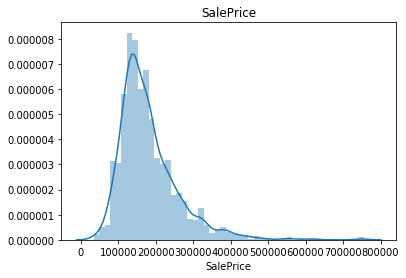

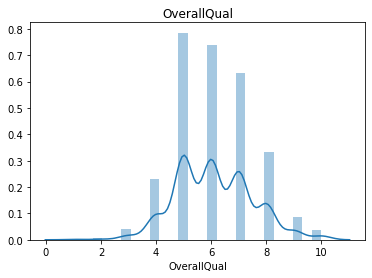

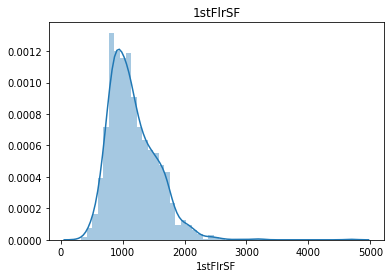

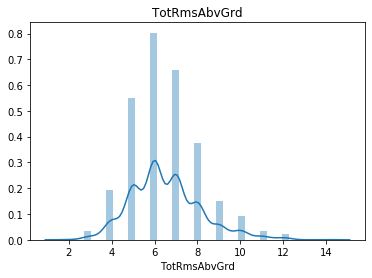

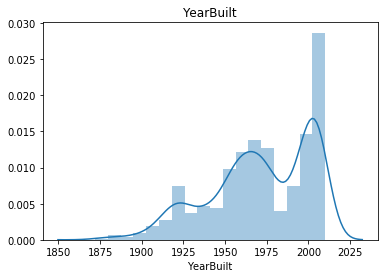

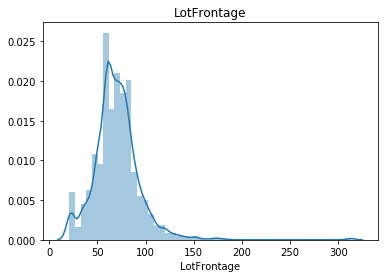

In [8]:
#Debido a que hay presencia de nan, estos no se toman en cuenta para graficar los histogramas
for columns in dataset_pandas.columns:
    sns.distplot(dataset_pandas[columns].dropna(), kde=True, label=columns)
    plt.title(columns)
    plt.show()

#### 5. Para cada variable independiente x :
 - Calcular el coeficiente de correlación entre x y y.
 - Graficar x vs y (scatterplot) usando matplotlib.
 - Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.
 - Basado en la gráfica y el coeficiente de correlación de cada par x, y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

In [9]:
x_values = dataset_pandas.drop('SalePrice', axis=1)
y_values = dataset_pandas['SalePrice']
correlation_values = []

#Debido a que la última columna de LotFrontage tiene valores nan estos deben ser ignorados
mask = np.isnan(x_values).any(axis=1) | np.isnan(y_values)
x_values = x_values[~mask]
y_values = y_values[~mask]

#Se calculan los coeficiente de correlación por medio de un ciclo for y se agregan a una lista
for columns in x_values.columns:
    corr = np.corrcoef(x_values[columns], y_values)[0][1]
    correlation_values.append(corr)

#Se hace un ciclo for para imprimir el nombre de cada variable y su coeficiente de correlación
x_names = ["OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]
for i in range(len(x_names)):
    print(f"Correlación para {x_names[i]} es de: {correlation_values[i]}")

Correlación para OverallQual es de: 0.8022874575382487
Correlación para 1stFlrSF es de: 0.6201593874317681
Correlación para TotRmsAbvGrd es de: 0.5372152971318784
Correlación para YearBuilt es de: 0.5389132355774933
Correlación para LotFrontage es de: 0.35179909657067804


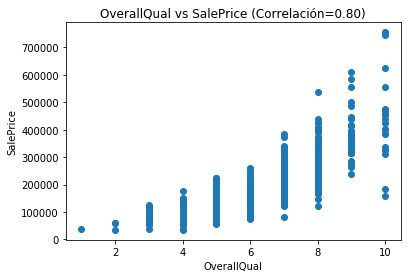

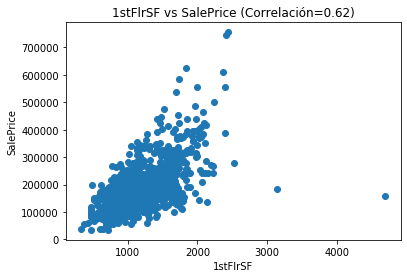

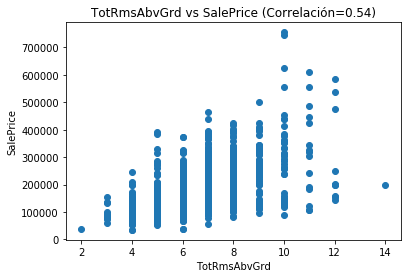

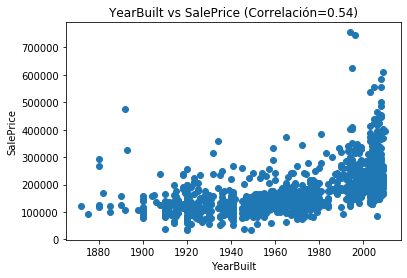

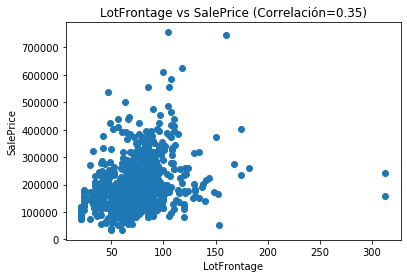

In [10]:
#Se emplea un ciclo for para generar las graficas 
for i, col in enumerate(x_values.columns):
    fig, ax = plt.subplots()
    ax.scatter(x_values[col], y_values)
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{col} vs SalePrice (Correlación={correlation_values[i]:.2f})')

In [11]:
correlations_df = pd.DataFrame({'Variable': x_values.columns, 'Coeficiente_de_correlación': correlation_values})
correlations_df = correlations_df.sort_values('Coeficiente_de_correlación', ascending=False)
top_two_variables = correlations_df.iloc[:2]['Variable'].tolist()
for i in range(len(top_two_variables)):
    print(f"La variable {i+1} a escoger es: {top_two_variables[i]} Vs SalePrice")

La variable 1 a escoger es: OverallQual Vs SalePrice
La variable 2 a escoger es: 1stFlrSF Vs SalePrice


#### 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0 +β1 ∗x.
La función recibe como argumentos:
 - 6.1 Vector con la variable independiente x,
 - 6.2 Vector con la variable dependiente y,
 - 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
 - 6.4 un entero imprimir error cada, que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
 - 6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [12]:
def linear_regression_manually(x, y, epochs, error_print, learning_rate):
    # Se crea una matriz de dos columnas, siendo la primera X y por ende la segunda y 
    X = np.column_stack((x, np.ones(len(x))))
    # Se deben inicializar los valores en 0
    beta = np.zeros(2)
    # Se crea una lista para almacenar los errores
    errors = []
    resultados = []
    for i in range(epochs):
        # Calcular la prediccion para todas las observaciones de manera simultánea(vectorizada)
        y_predicto = np.dot(X, beta)
        # Se calcula el error para cada iteración
        error = np.sum((y - y_predicto)**2) / (2 * len(y))
        errors.append(error)
        # Imprimir el error cada que se le halla indicado en error_print.
        if i % error_print == 0:
            print(f"En la iteración {i} el error es de: {error}")
        # Se calcula el gradiente del error respecto a cada uno de los parámetros
        gradients = np.dot(X.T, (y_predicto - y)) / len(y)
        # Se actualizan los valores del modelo
        beta = beta - learning_rate * gradients
        resultados.append(beta)
    return resultados, errors


In [13]:
def erros_vs_time(error_values):
    chart = plt.figure(figsize = (12,6))
    plt.plot(range(len(error_values)), error_values)
    plt.xlabel('Número de iteración')
    plt.ylabel('Error generado')
    plt.title('Error Vs Tiempo')
    plt.show()


In [36]:
# Función para graficar la evolución de un modelo de entrenamiento a lo largo del tiempo para una variable X específica
def time_train(resultado, n, n_var):
    forma_X = data_train.shape
    # Crear una matriz X de unos con la misma forma que la matriz de datos de entrenamiento, pero con la primera columna multiplicada por los valores correspondientes de la columna "n_var"
    matriz_X = np.ones((forma_X[0], 2))
    matriz_X[::, 0] *= data_train[::, n_var]
    # Crear una figura de gráficos y trazar un gráfico de dispersión de los datos de entrenamiento para las coordenadas X e Y especificadas
    fig = plt.figure(figsize=(15, 10))
    plt.scatter(dataset[::, n_var], dataset[::, 0])
    plt.title("Evolución del modelo de entrenamiento a lo largo del tiempo")
    # Iterar a través de la lista de resultados del modelo de entrenamiento y graficar la línea resultante para cada iteración que sea un múltiplo de "n"
    for i in range(0, len(resultado)):
        if (i % n == 0):
            y_pred = np.matmul(matriz_X, resultado[i])
            plt.plot(data_train[::, n_var], y_pred)
    return



### Entrenamiento de modelos de regresión lineal

##### Variable X1

In [37]:
resultado1, error1 = linear_regression_manually(data_train[::,1],data_train[::,0], 200, 50,0.0009)

En la iteración 0 el error es de: 19409722053.22175
En la iteración 50 el error es de: 1851219492.224189
En la iteración 100 el error es de: 1404283391.494626
En la iteración 150 el error es de: 1391914720.5050893


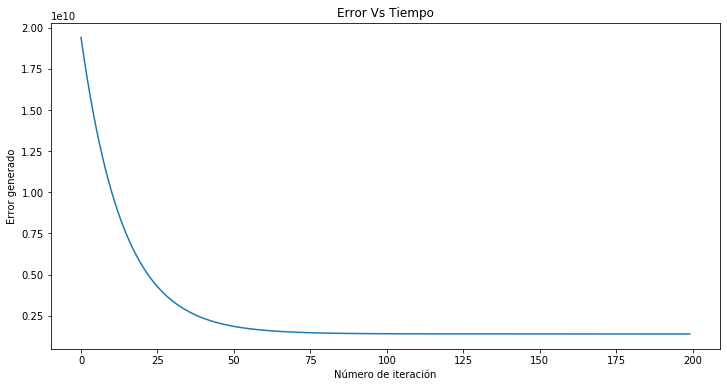

In [38]:
erros_vs_time(error1)

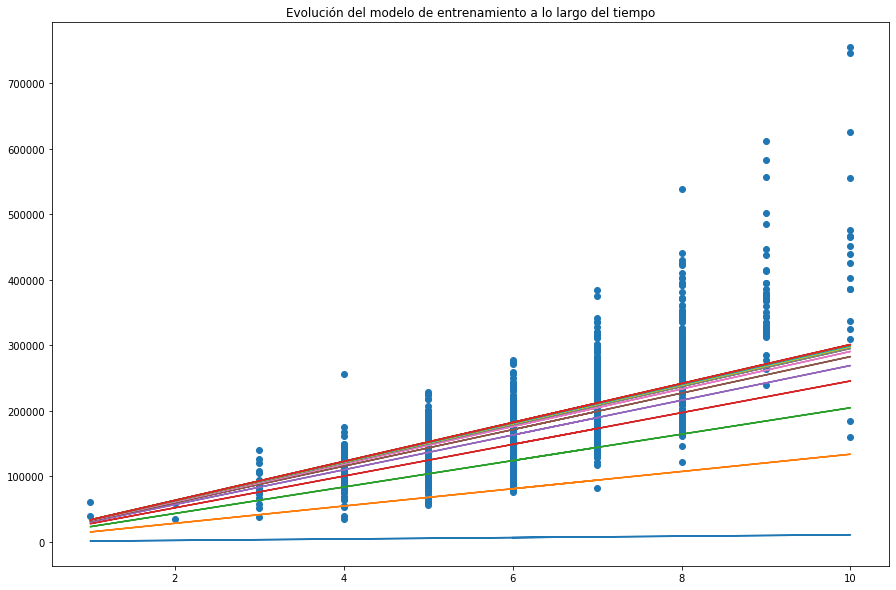

In [39]:
time_train(resultado1, 15, 1)


#### Variable X2


In [40]:
resultado2, error2 = linear_regression_manually(data_train[::,2],data_train[::,0], 200, 25,0.0000009)

En la iteración 0 el error es de: 19409722053.22175
En la iteración 25 el error es de: 1968092901.715756
En la iteración 50 el error es de: 1968092716.824201
En la iteración 75 el error es de: 1968092531.9334333
En la iteración 100 el error es de: 1968092347.043452
En la iteración 125 el error es de: 1968092162.154257
En la iteración 150 el error es de: 1968091977.2658482
En la iteración 175 el error es de: 1968091792.3782265


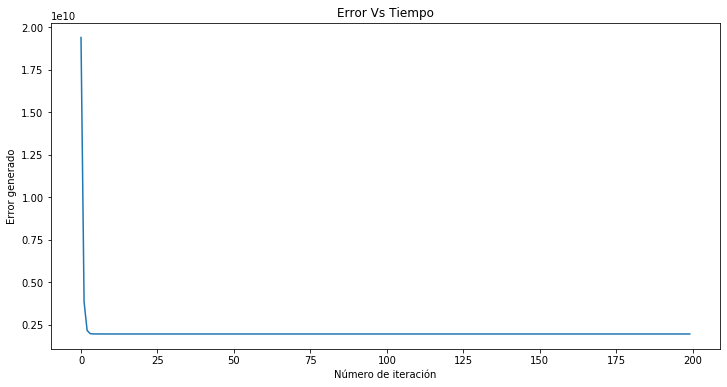

In [41]:
erros_vs_time(error2)

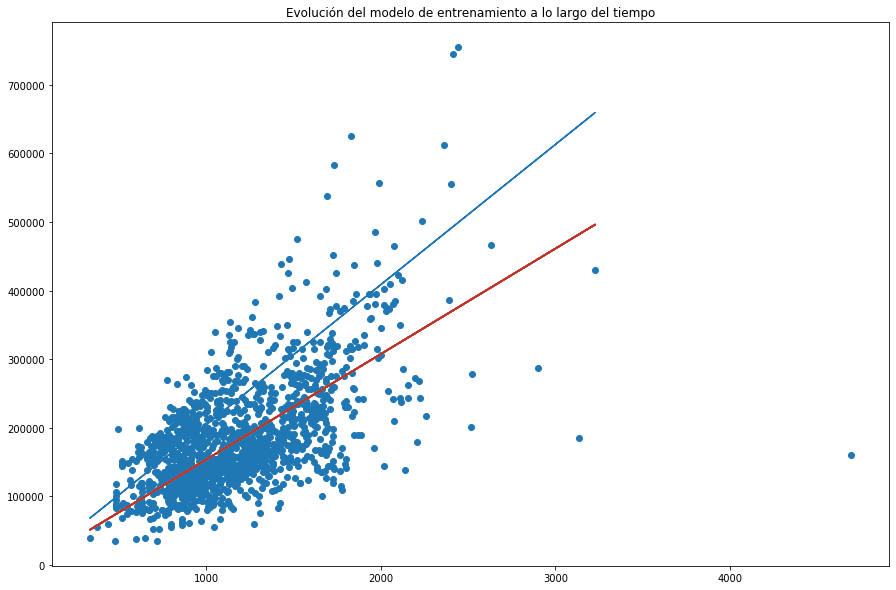

In [42]:
time_train(resultado2, 15, 2)

### Usar Scikit-learn para entrar el modelo de regresión lineal

In [47]:
#Para variable 1
from sklearn.linear_model import LinearRegression
training_model = LinearRegression()
training_model.fit(data_train[::, 1].reshape(-1, 1), data_train[::, 0])
print("El coeficiente es: " + str(training_model.coef_))
print("Los interceptos son: " + str(training_model.intercept_))


El coeficiente es: [45411.99877916]
Los interceptos son: -96469.57131873982


In [48]:
#Para variable 2
from sklearn.linear_model import LinearRegression
training_model2 = LinearRegression()
training_model2.fit(data_train[::, 2].reshape(-1, 1), data_train[::, 0])
print("El coeficiente es: " + str(training_model2.coef_))
print("Los interceptos son: " + str(training_model2.intercept_))


El coeficiente es: [129.95124229]
Los interceptos son: 30324.585174963664


### La combinación (promedio) de las 2 anteriores

In [49]:
def predicciones(modelo_a, modelo_b):
    # Calcular el promedio de los modelos utilizando la función "nanmean" de la biblioteca NumPy y la función "vstack" para apilar los modelos verticalmente
    modelo_promedio = np.nanmean(np.vstack((modelo_a, modelo_b)), axis=0)
    # Devolver los tres modelos: el modelo a, el modelo b y el modelo promedio
    return modelo_a, modelo_b, modelo_promedio

#### Variable 1

In [50]:
manualx1 = resultado1[len(resultado1)-1]
sklearn_x1 = np.array((training_model.coef_[0], training_model.intercept_))
mm_x1, ms_x1, mp_x1 = predicciones(manualx1, sklearn_x1)
print(mp_x1)

[ 37576.57690318 -46352.23305871]


#### Variable 2

In [51]:
manualx2 = resultado2[len(resultado2)-1]
sklearn_x2 = np.array((training_model2.coef_[0], training_model2.intercept_))
mm_x2, ms_x2, mp_x2 = predicciones(manualx2, sklearn_x2)
print(mp_x2)

[  141.8239514  15162.61075702]


### Deteterminación de los calculos de error para cada modelo

In [52]:
# Función para calcular los errores de tres modelos de aprendizaje automático
def errores(datos_entrenamiento, resultados_entrenamiento, modelo_a, modelo_b, modelo_c):
    # Obtener la forma de los datos de entrenamiento y crear una matriz X de unos con la misma forma
    forma_X = datos_entrenamiento.shape
    matriz_X = np.ones((forma_X[0], 2))
    # Multiplicar la primera columna de la matriz X por los valores correspondientes de los datos de entrenamiento
    matriz_X[::, 0] *= datos_entrenamiento
    # Calcular los errores para los tres modelos utilizando la fórmula del error cuadrático medio (MSE)
    error_a = 0.5 * np.mean((np.matmul(matriz_X, modelo_a) - resultados_entrenamiento) ** 2)
    error_b = 0.5 * np.mean((np.matmul(matriz_X, modelo_b) - resultados_entrenamiento) ** 2)
    error_c = 0.5 * np.mean((np.matmul(matriz_X, modelo_c) - resultados_entrenamiento) ** 2)
    # Devolver los errores de los tres modelos
    return error_a, error_b, error_c


In [54]:
manual_errorx1, sklear_errorx1, promedio_error_x1 = errores(data_train[::,1], data_train[::,0],mm_x1, ms_x1, mp_x1)
print(manual_errorx1, sklear_errorx1, promedio_error_x1)

1390586596.8210142 1146916219.458369 1207833813.7990308


In [56]:
manual_errorx2, sklear_errorx2, promedio_error_x2 = errores(data_train[::,2], data_train[::,0], mm_x2, ms_x2, mp_x2)
print(manual_errorx2, sklear_errorx2, promedio_error_x2)

1968091607.4913907 1924628861.9600515 1935494548.3428862
